In [1]:
import pandas as pd
import numpy as np
import pickle 
import patsy
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split


In [2]:
df = pd.read_csv('yellow_tripdata7.csv')

In [3]:
df.head(5)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1.0,2021-07-01 00:08:51,2021-07-01 00:13:05,1.0,0.8,1.0,N,90,68,1.0,5.0,3.0,0.5,0.0,0.0,0.3,8.8,2.5
1,1.0,2021-07-01 00:22:39,2021-07-01 00:25:58,1.0,0.9,1.0,N,113,90,2.0,5.0,3.0,0.5,0.0,0.0,0.3,8.8,2.5
2,1.0,2021-07-01 00:48:33,2021-07-01 00:54:58,1.0,2.8,1.0,N,88,232,2.0,10.0,3.0,0.5,0.0,0.0,0.3,13.8,2.5
3,1.0,2021-07-01 00:59:44,2021-07-01 01:07:09,1.0,1.4,1.0,N,79,249,1.0,7.0,3.0,0.5,1.5,0.0,0.3,12.3,2.5
4,1.0,2021-07-01 00:08:35,2021-07-01 00:16:28,0.0,2.0,1.0,N,142,238,1.0,8.5,3.0,0.5,0.0,0.0,0.3,12.3,2.5


In [4]:
df.tail(5)


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
2821510,NaN,2021-07-09 18:07:09,2021-07-09 18:27:04,NaN,2.60,NaN,NaN,68,144,NaN,14.00,1.00,0.5,2.75,0.0,0.3,21.05,2.5
2821511,NaN,2021-07-09 18:16:00,2021-07-09 18:57:00,NaN,12.47,NaN,NaN,92,144,NaN,47.08,2.75,0.5,0.00,0.0,0.3,50.63,0.0
2821512,NaN,2021-07-09 18:07:46,2021-07-09 19:07:06,NaN,3.01,NaN,NaN,265,249,NaN,23.96,0.00,0.5,0.00,0.0,0.3,24.76,0.0
2821513,NaN,2021-07-09 18:17:00,2021-07-09 18:42:00,NaN,6.67,NaN,NaN,262,211,NaN,24.24,0.00,0.5,5.96,0.0,0.3,33.50,2.5
2821514,NaN,2021-07-09 18:11:00,2021-07-09 18:30:00,NaN,3.51,NaN,NaN,232,68,NaN,15.27,0.00,0.5,3.96,0.0,0.3,22.53,2.5


In [5]:
df.sample(10)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
1043014,2.0,2021-07-13 21:39:34,2021-07-13 21:45:14,2.0,1.02,1.0,N,263,237,1.0,6.00,0.5,0.5,1.00,0.00,0.3,10.80,2.5
1075856,2.0,2021-07-14 07:45:57,2021-07-14 07:51:16,1.0,1.05,1.0,N,236,236,1.0,6.00,0.0,0.5,2.00,0.00,0.3,11.30,2.5
158817,1.0,2021-07-02 20:03:30,2021-07-02 20:22:45,1.0,2.20,1.0,N,158,148,1.0,13.50,3.0,0.5,3.45,0.00,0.3,20.75,2.5
2072792,2.0,2021-07-25 02:41:55,2021-07-25 03:00:01,1.0,5.80,1.0,N,79,7,1.0,18.50,0.5,0.5,5.00,0.00,0.3,27.30,2.5
2752870,NaN,2021-07-13 12:31:00,2021-07-13 13:01:00,NaN,10.62,NaN,NaN,163,138,NaN,35.68,0.0,0.5,14.73,6.55,0.3,60.26,2.5
2315060,2.0,2021-07-27 23:03:03,2021-07-27 23:16:05,1.0,3.50,1.0,N,263,42,1.0,12.50,0.5,0.5,4.08,0.00,0.3,20.38,2.5
2092822,2.0,2021-07-25 12:52:02,2021-07-25 13:00:39,1.0,1.58,1.0,N,137,229,1.0,8.00,0.0,0.5,2.00,0.00,0.3,13.30,2.5
1799978,1.0,2021-07-22 09:43:07,2021-07-22 09:49:28,1.0,0.70,1.0,N,234,107,2.0,6.00,2.5,0.5,0.00,0.00,0.3,9.30,2.5
1395294,2.0,2021-07-17 14:38:01,2021-07-17 14:45:13,3.0,0.92,1.0,N,50,161,1.0,6.00,0.0,0.5,1.49,0.00,0.3,10.79,2.5
860153,2.0,2021-07-11 18:03:32,2021-07-11 18:37:51,1.0,8.83,1.0,N,161,36,2.0,30.50,0.0,0.5,0.00,0.00,0.3,33.80,2.5


In [6]:
df.shape

(2821515, 18)

In [7]:
df_train,df_test=train_test_split(df, test_size=.01, random_state=199)

In [8]:
df_train,df_val = train_test_split(df_train, test_size=.01, random_state=199)

In [9]:
df_train.shape

(2765366, 18)

In [10]:
df_test.shape

(28216, 18)

In [11]:
df_val.shape

(27933, 18)

In [12]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2765366 entries, 1893944 to 292431
Data columns (total 18 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   VendorID               float64
 1   tpep_pickup_datetime   object 
 2   tpep_dropoff_datetime  object 
 3   passenger_count        float64
 4   trip_distance          float64
 5   RatecodeID             float64
 6   store_and_fwd_flag     object 
 7   PULocationID           int64  
 8   DOLocationID           int64  
 9   payment_type           float64
 10  fare_amount            float64
 11  extra                  float64
 12  mta_tax                float64
 13  tip_amount             float64
 14  tolls_amount           float64
 15  improvement_surcharge  float64
 16  total_amount           float64
 17  congestion_surcharge   float64
dtypes: float64(13), int64(2), object(3)
memory usage: 400.9+ MB


In [13]:
df_train.isnull().sum()

VendorID                 128068
tpep_pickup_datetime          0
tpep_dropoff_datetime         0
passenger_count          128068
trip_distance                 0
RatecodeID               128068
store_and_fwd_flag       128068
PULocationID                  0
DOLocationID                  0
payment_type             128068
fare_amount                   0
extra                         0
mta_tax                       0
tip_amount                    0
tolls_amount                  0
improvement_surcharge         0
total_amount                  0
congestion_surcharge          0
dtype: int64

In [14]:
df_train=df_train.dropna(how='any')

In [15]:
df_train['payment_type'].value_counts()

1.0    1988014
2.0     623963
3.0      13924
4.0      11396
5.0          1
Name: payment_type, dtype: int64

In [16]:
df_train=df_train.drop(df_train[df_train.payment_type.values==5].index)

In [17]:
df_train['payment_type'].value_counts()

1.0    1988014
2.0     623963
3.0      13924
4.0      11396
Name: payment_type, dtype: int64

In [18]:
df_train['passenger_count'].value_counts()

1.0    1887983
2.0     406755
3.0     113985
5.0      70303
0.0      65431
4.0      49640
6.0      43186
9.0          5
7.0          5
8.0          4
Name: passenger_count, dtype: int64

In [19]:
df_train=df_train.drop(df_train[df_train.passenger_count.values==0].index)
df_train=df_train.drop(df_train[df_train.passenger_count.values==9].index)
df_train=df_train.drop(df_train[df_train.passenger_count.values==8].index)
df_train=df_train.drop(df_train[df_train.passenger_count.values==7].index)

In [20]:
df_train=df_train.drop(df_train[df_train.total_amount.values<=0].index)

In [21]:
df_train=df_train.drop(df_train[df_train.trip_distance.values<=0].index)

In [22]:
df_train.shape

(2530493, 18)

In [23]:
df.tpep_dropoff_datetime = pd.to_datetime(df.tpep_dropoff_datetime)
df.tpep_pickup_datetime = pd.to_datetime(df.tpep_pickup_datetime)

df_train['trip_time'] = df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']

df_train

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,trip_time
1893944,2.0,2021-07-23 08:55:24,2021-07-23 09:00:49,1.0,1.17,1.0,N,236,237,1.0,6.0,0.0,0.5,1.50,0.00,0.3,10.80,2.5,0 days 00:05:25
474787,2.0,2021-07-07 12:47:35,2021-07-07 12:55:32,2.0,1.72,1.0,N,170,141,1.0,8.0,0.0,0.5,2.26,0.00,0.3,13.56,2.5,0 days 00:07:57
2462355,2.0,2021-07-29 15:49:00,2021-07-29 16:01:10,1.0,1.90,1.0,N,142,141,1.0,10.0,0.0,0.5,3.32,0.00,0.3,16.62,2.5,0 days 00:12:10
1503423,2.0,2021-07-18 19:19:25,2021-07-18 19:26:39,1.0,0.89,1.0,N,229,43,2.0,6.5,0.0,0.5,0.00,0.00,0.3,9.80,2.5,0 days 00:07:14
1452644,2.0,2021-07-18 04:18:14,2021-07-18 04:53:22,1.0,8.32,1.0,N,186,75,2.0,30.0,0.5,0.5,0.00,0.00,0.3,33.80,2.5,0 days 00:35:08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
722518,2.0,2021-07-10 01:11:20,2021-07-10 01:33:28,1.0,9.34,1.0,N,138,151,1.0,28.0,0.5,0.5,7.17,6.55,0.3,44.27,0.0,0 days 00:22:08
123269,2.0,2021-07-02 14:33:24,2021-07-02 14:58:39,1.0,3.30,1.0,N,141,50,1.0,17.5,0.0,0.5,4.16,0.00,0.3,24.96,2.5,0 days 00:25:15
1906657,2.0,2021-07-23 11:40:56,2021-07-23 11:45:12,1.0,0.80,1.0,N,162,237,1.0,5.5,0.0,0.5,2.64,0.00,0.3,11.44,2.5,0 days 00:04:16
969865,2.0,2021-07-13 08:22:38,2021-07-13 08:29:47,1.0,1.07,1.0,N,238,166,1.0,7.0,0.0,0.5,0.70,0.00,0.3,11.00,2.5,0 days 00:07:09


In [24]:
df_train_sample=df_train.sample(100000)

In [25]:
df_train_sample

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,trip_time
2485867,2.0,2021-07-29 18:25:33,2021-07-29 18:35:48,1.0,2.21,1.0,N,237,238,1.0,9.5,1.00,0.5,2.07,0.00,0.3,15.87,2.5,0 days 00:10:15
805884,2.0,2021-07-11 00:44:18,2021-07-11 00:47:00,2.0,0.37,1.0,N,107,234,1.0,4.0,0.50,0.5,1.56,0.00,0.3,9.36,2.5,0 days 00:02:42
564425,1.0,2021-07-08 11:41:53,2021-07-08 11:50:00,1.0,0.90,1.0,N,158,249,2.0,6.5,2.50,0.5,0.00,0.00,0.3,9.80,2.5,0 days 00:08:07
1790324,2.0,2021-07-22 07:53:48,2021-07-22 07:56:19,2.0,0.91,1.0,N,186,234,1.0,4.5,0.00,0.5,1.56,0.00,0.3,9.36,2.5,0 days 00:02:31
2025724,2.0,2021-07-24 16:59:36,2021-07-24 17:14:48,1.0,2.93,1.0,N,163,75,1.0,13.0,0.00,0.5,3.26,0.00,0.3,19.56,2.5,0 days 00:15:12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1738147,2.0,2021-07-21 15:55:39,2021-07-21 16:53:48,1.0,16.86,1.0,N,68,265,2.0,52.5,0.00,0.5,0.00,2.45,0.3,58.25,2.5,0 days 00:58:09
2527533,2.0,2021-07-30 10:57:57,2021-07-30 11:13:33,1.0,2.82,1.0,N,142,164,1.0,12.5,0.00,0.5,3.95,0.00,0.3,19.75,2.5,0 days 00:15:36
444664,1.0,2021-07-07 00:30:00,2021-07-07 00:40:46,1.0,4.10,1.0,N,142,166,1.0,13.5,3.00,0.5,3.45,0.00,0.3,20.75,2.5,0 days 00:10:46
508078,1.0,2021-07-07 17:31:45,2021-07-07 18:06:59,1.0,17.80,2.0,N,132,186,1.0,52.0,8.25,0.5,0.00,6.55,0.3,67.60,2.5,0 days 00:35:14


In [26]:
df_train_sample.total_amount.describe()

count    100000.000000
mean         19.391749
std          14.666233
min           0.010000
25%          11.760000
50%          14.800000
75%          20.540000
max         561.050000
Name: total_amount, dtype: float64

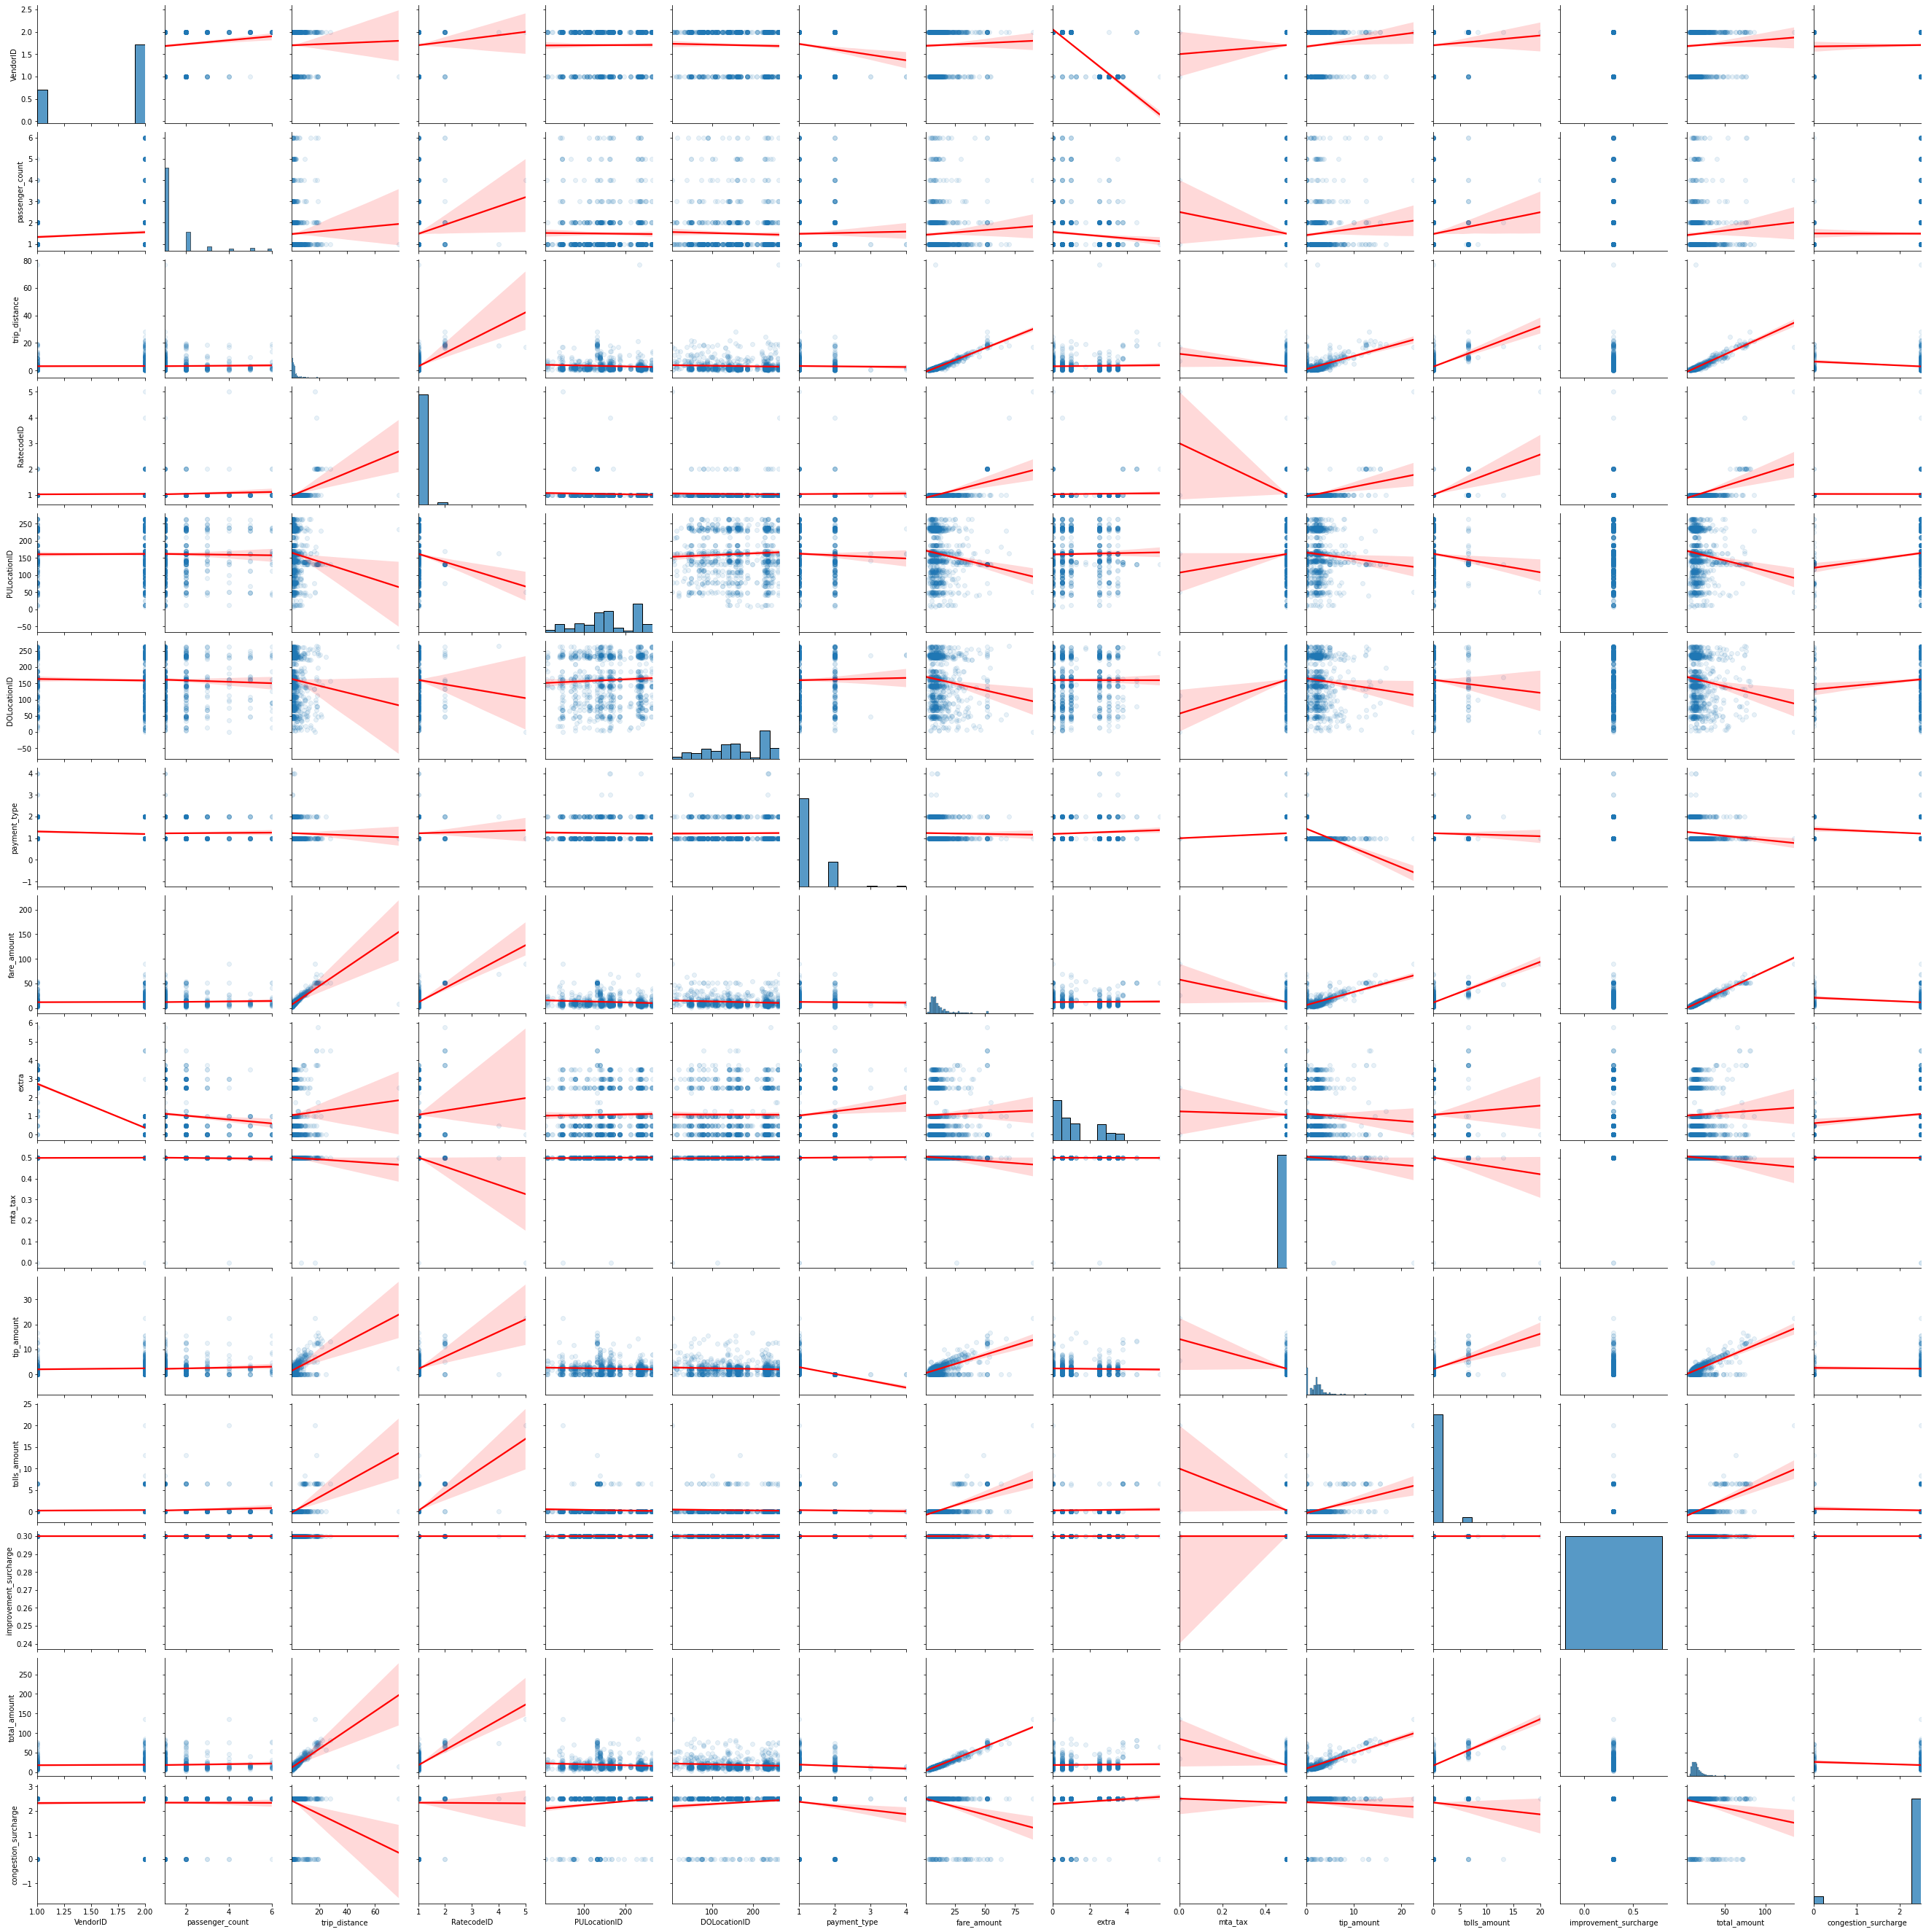

In [27]:
g = sns.pairplot(df_train_sample[:1000], kind='reg', plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.1}})


In [30]:
df_train_sample['tpep_pickup_datetime']=pd.to_datetime(df_train_sample['tpep_pickup_datetime'])
df_train_sample['tpep_dropoff_datetime']=pd.to_datetime(df_train_sample['tpep_dropoff_datetime'])
df_train_sample['pickup_day_no']=df_train_sample['tpep_pickup_datetime'].dt.weekday
df_train_sample['dropoff_day_no']=df_train_sample['tpep_dropoff_datetime'].dt.weekday
df_train_sample['pickup_hour']=df_train_sample['tpep_pickup_datetime'].dt.hour
df_train_sample['dropoff_hour']=df_train_sample['tpep_dropoff_datetime'].dt.hour

In [31]:
df_train_sample

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,trip_time,pickup_day_no,dropoff_day_no,pickup_hour,dropoff_hour
2485867,2.0,2021-07-29 18:25:33,2021-07-29 18:35:48,1.0,2.21,1.0,N,237,238,1.0,...,2.07,0.00,0.3,15.87,2.5,0 days 00:10:15,3,3,18,18
805884,2.0,2021-07-11 00:44:18,2021-07-11 00:47:00,2.0,0.37,1.0,N,107,234,1.0,...,1.56,0.00,0.3,9.36,2.5,0 days 00:02:42,6,6,0,0
564425,1.0,2021-07-08 11:41:53,2021-07-08 11:50:00,1.0,0.90,1.0,N,158,249,2.0,...,0.00,0.00,0.3,9.80,2.5,0 days 00:08:07,3,3,11,11
1790324,2.0,2021-07-22 07:53:48,2021-07-22 07:56:19,2.0,0.91,1.0,N,186,234,1.0,...,1.56,0.00,0.3,9.36,2.5,0 days 00:02:31,3,3,7,7
2025724,2.0,2021-07-24 16:59:36,2021-07-24 17:14:48,1.0,2.93,1.0,N,163,75,1.0,...,3.26,0.00,0.3,19.56,2.5,0 days 00:15:12,5,5,16,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1738147,2.0,2021-07-21 15:55:39,2021-07-21 16:53:48,1.0,16.86,1.0,N,68,265,2.0,...,0.00,2.45,0.3,58.25,2.5,0 days 00:58:09,2,2,15,16
2527533,2.0,2021-07-30 10:57:57,2021-07-30 11:13:33,1.0,2.82,1.0,N,142,164,1.0,...,3.95,0.00,0.3,19.75,2.5,0 days 00:15:36,4,4,10,11
444664,1.0,2021-07-07 00:30:00,2021-07-07 00:40:46,1.0,4.10,1.0,N,142,166,1.0,...,3.45,0.00,0.3,20.75,2.5,0 days 00:10:46,2,2,0,0
508078,1.0,2021-07-07 17:31:45,2021-07-07 18:06:59,1.0,17.80,2.0,N,132,186,1.0,...,0.00,6.55,0.3,67.60,2.5,0 days 00:35:14,2,2,17,18


<AxesSubplot:>

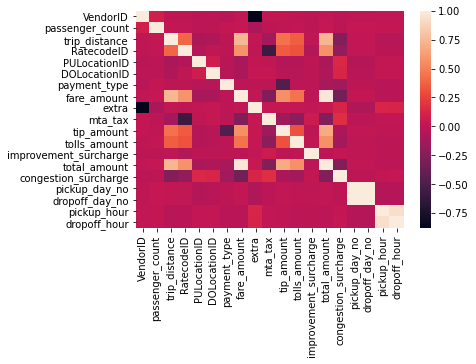

In [61]:

sns.heatmap(df_train_sample.corr())

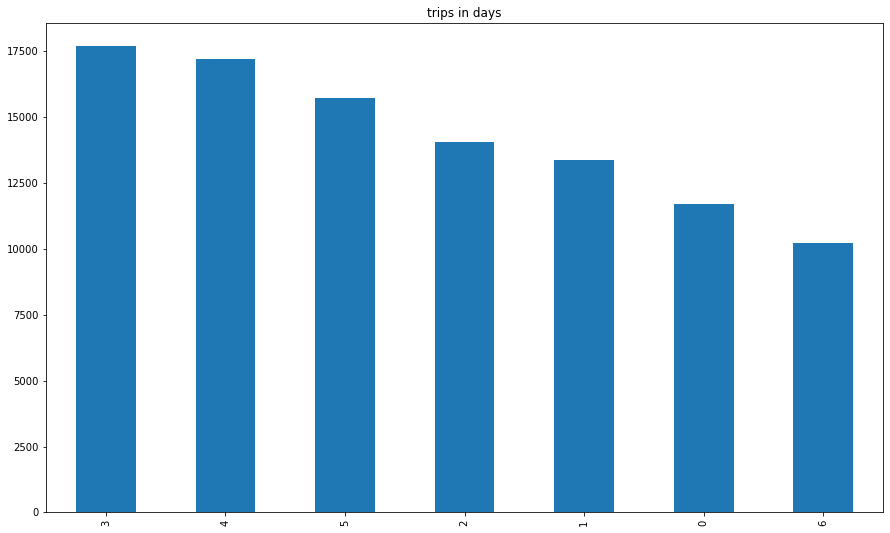

In [35]:
df_train_sample['pickup_day_no'].value_counts().plot(kind='bar', title= 'trips in days' , figsize=(15,9) );

<AxesSubplot:title={'center':'اكثر قيمة تتكرر'}>

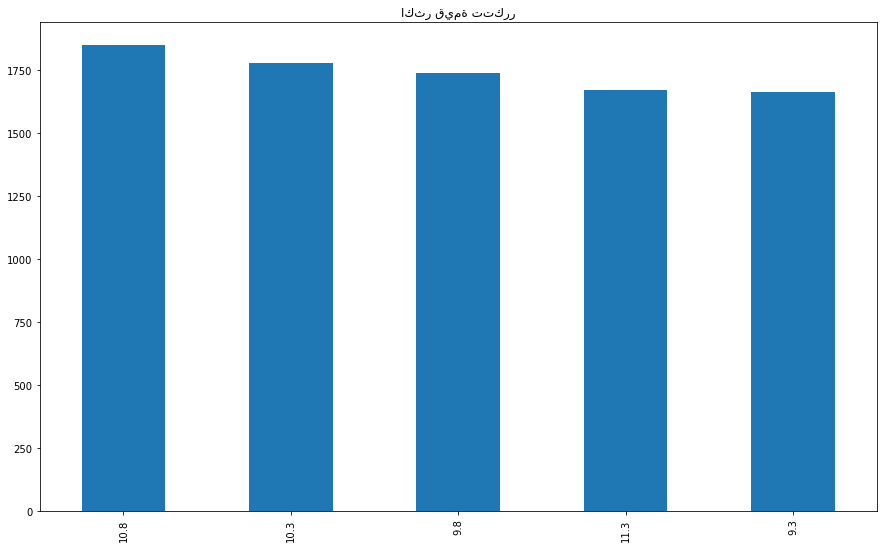

In [69]:
df_train_sample['total_amount'].sort_values().value_counts().iloc[:5].plot(kind='bar', title= 'highest value counts' , figsize=(15,9) )

<AxesSubplot:title={'center':'اكثر قيمة تتكرر'}>

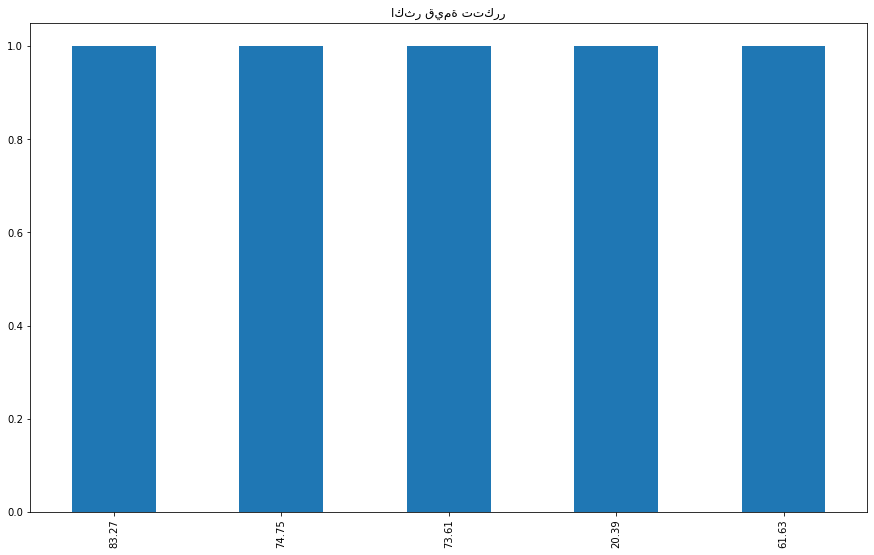

In [72]:
df_train_sample['total_amount'].value_counts().sort_values().iloc[:5].plot(kind='bar', title= 'highest price' , figsize=(15,9) )

In [83]:
sns.set(style="whitegrid")
xs = df['total_amount']
hue= df['payment_type']
ys = df['trip_distance']   
plt.figure(figsize=(20, 8))
g = sns.barplot(x=xs, y=ys, hue= hue,ci=None )
g.set_yscale("linear")
_ = g.set(xlabel="total", ylabel="distances")

KeyboardInterrupt: 

<Figure size 1440x576 with 0 Axes>

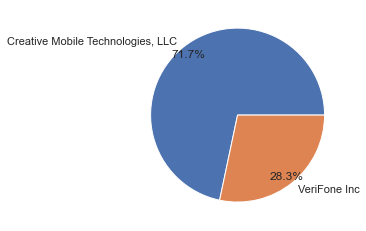

In [80]:
VendorID_count= df_train_sample['VendorID'].value_counts()

plt.pie(VendorID_count,labels=['Creative Mobile Technologies, LLC','VeriFone Inc'], autopct="%.1f%%", pctdistance=0.9);


<AxesSubplot:xlabel='total_amount', ylabel='Density'>

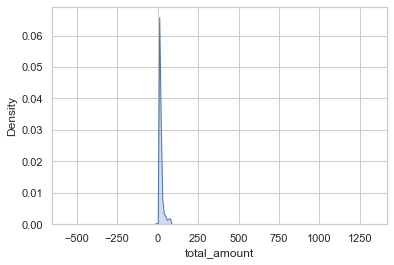

In [84]:
sns.kdeplot(data=df['total_amount'], shade=True)